In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
main_df = pd.read_csv('data/train.csv')
main_df.shape

(8693, 14)

In [4]:
main_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- Destination - The planet the passenger will be debarking to.

- Age - The age of the passenger.

- VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, 

- VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

- Name - The first and last names of the passenger.

- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [5]:
main_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


- Shape was (8693,14) so we have some missing values

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
# How many people were transported
main_df["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

<Axes: xlabel='Transported'>

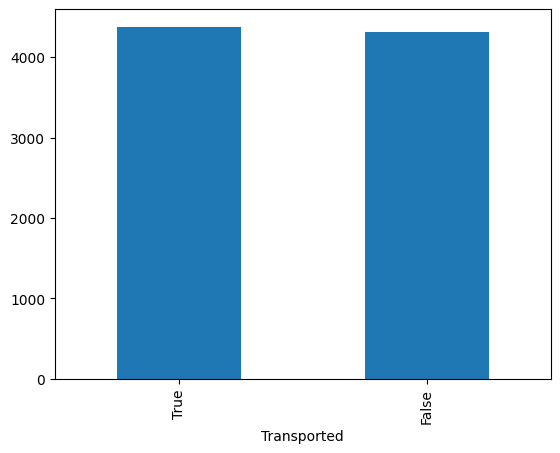

In [8]:
# Plot value counts
main_df["Transported"].value_counts().plot(kind="bar")

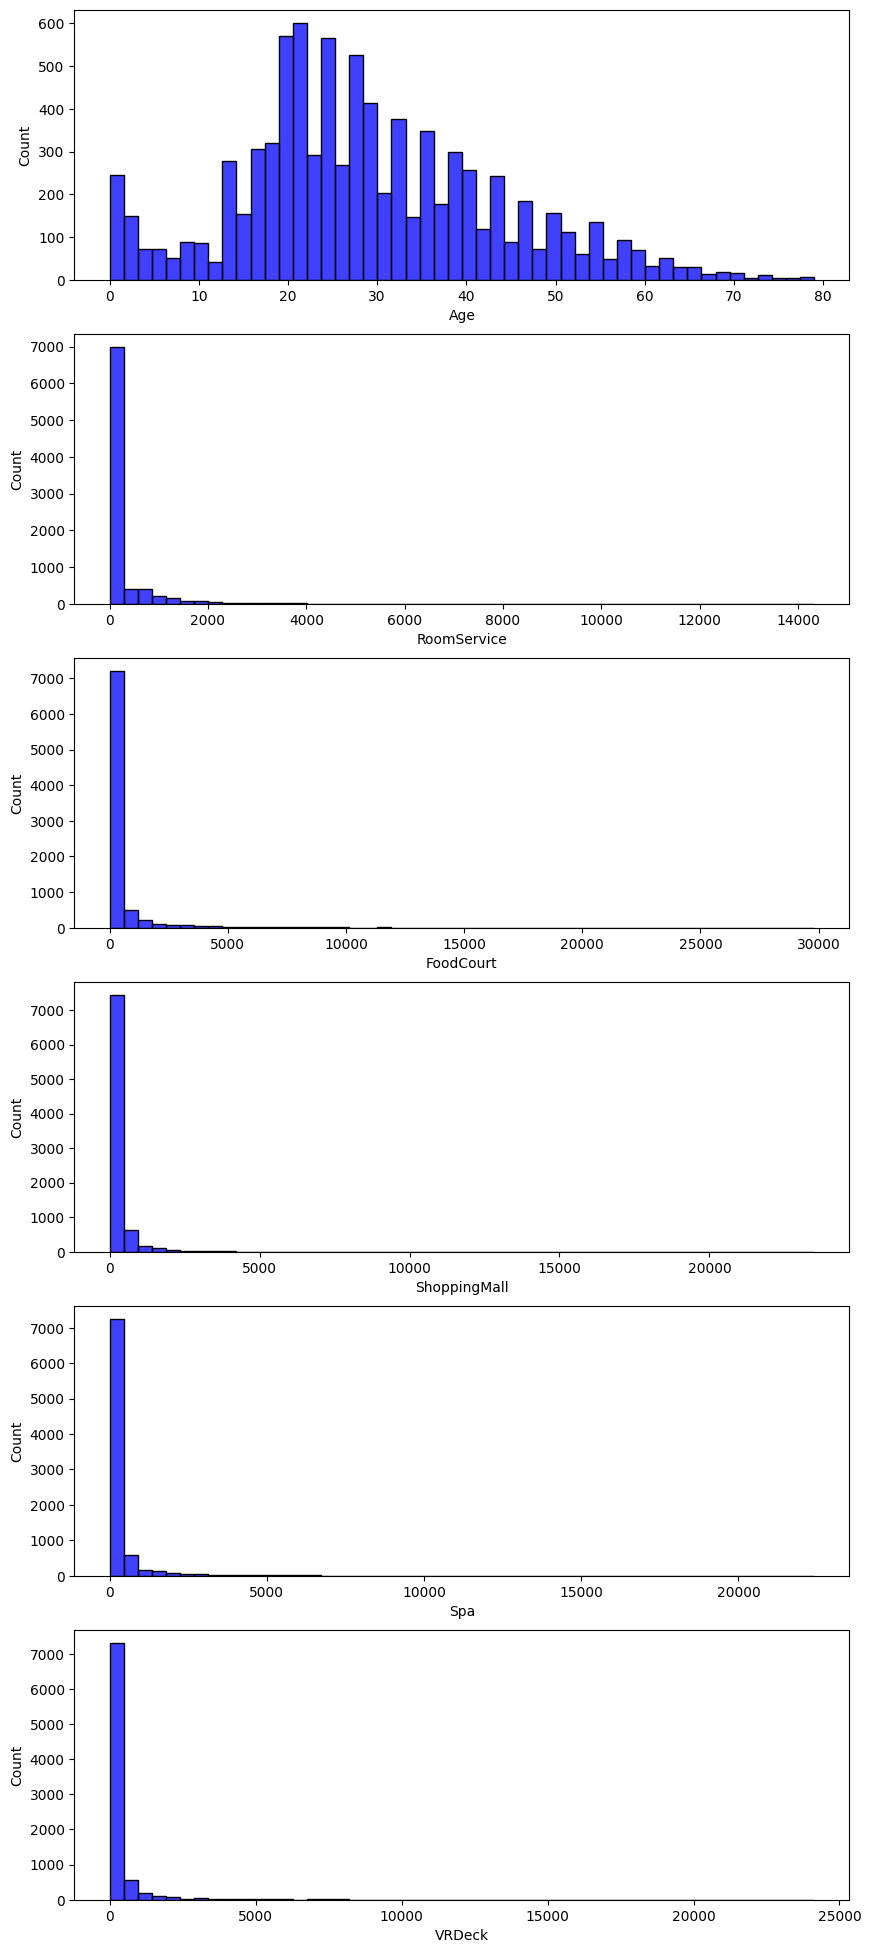

In [9]:
# Histograms
fig, ax = plt.subplots(6,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(main_df['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(main_df['RoomService'], color='b', bins=50, ax=ax[1]);
sns.histplot(main_df['FoodCourt'], color='b', bins=50, ax=ax[2]);
sns.histplot(main_df['ShoppingMall'], color='b', bins=50, ax=ax[3]);
sns.histplot(main_df['Spa'], color='b', bins=50, ax=ax[4]);
sns.histplot(main_df['VRDeck'], color='b', bins=50, ax=ax[5]);

Prepare dataset for training

In [10]:
# Drop Id and name as they are not necessary
train_df = main_df.copy()
train_df = train_df.drop(['PassengerId', 'Name'], axis=1)
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [11]:
# Check the number of nulls
train_df.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [12]:
# To deal with the nulls we will replace them with a 0
train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_df[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_df.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [13]:
# Now we will transform booleans to ints 0 = False, 1 = True
train_df["Transported"] = train_df["Transported"].astype(int)
train_df["VIP"] = train_df["VIP"].astype(int)
train_df["CryoSleep"] = train_df["CryoSleep"].astype(int)

In [14]:
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [15]:
# Cabin is a string consisting of Deck/Cabin_num/Side so we will separate them in 3 columns
train_df[["Deck", "Cabin_num", "Side"]] = train_df["Cabin"].str.split("/", expand=True)

# EDA

Text(0.5, 0, 'Age (years)')

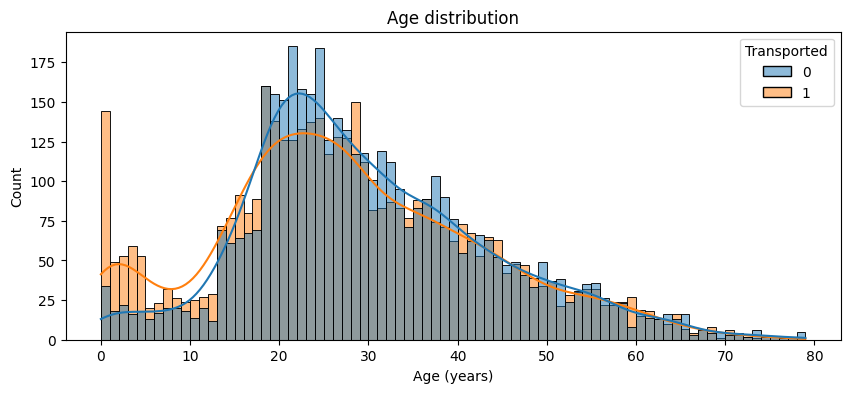

In [16]:
# Lets plot the Transported per age
plt.figure(figsize=(10,4))

# Histogram
sns.histplot(data=train_df, x='Age', hue='Transported', binwidth=1, kde=True)

# Aesthetics
plt.title('Age distribution')
plt.xlabel('Age (years)')

- 0-18 year olds were more likely to be transported than not.
- 18-25 year olds were less likely to be transported than not.
- Over 25 year olds were about equally likely to be transported than not.

In [17]:
# Lets create a new feature for this 3 groups

# Function to assign AgeGroup based on age
def assign_age_group(age):
    if age == 0:
        return 0
    elif 1 <= age <= 18:
        return 1
    elif 19 <= age <= 25:
        return 2
    else:
        return 3

# Apply the function to create the new AgeGroup column
train_df['AgeGroup'] = train_df['Age'].apply(assign_age_group)

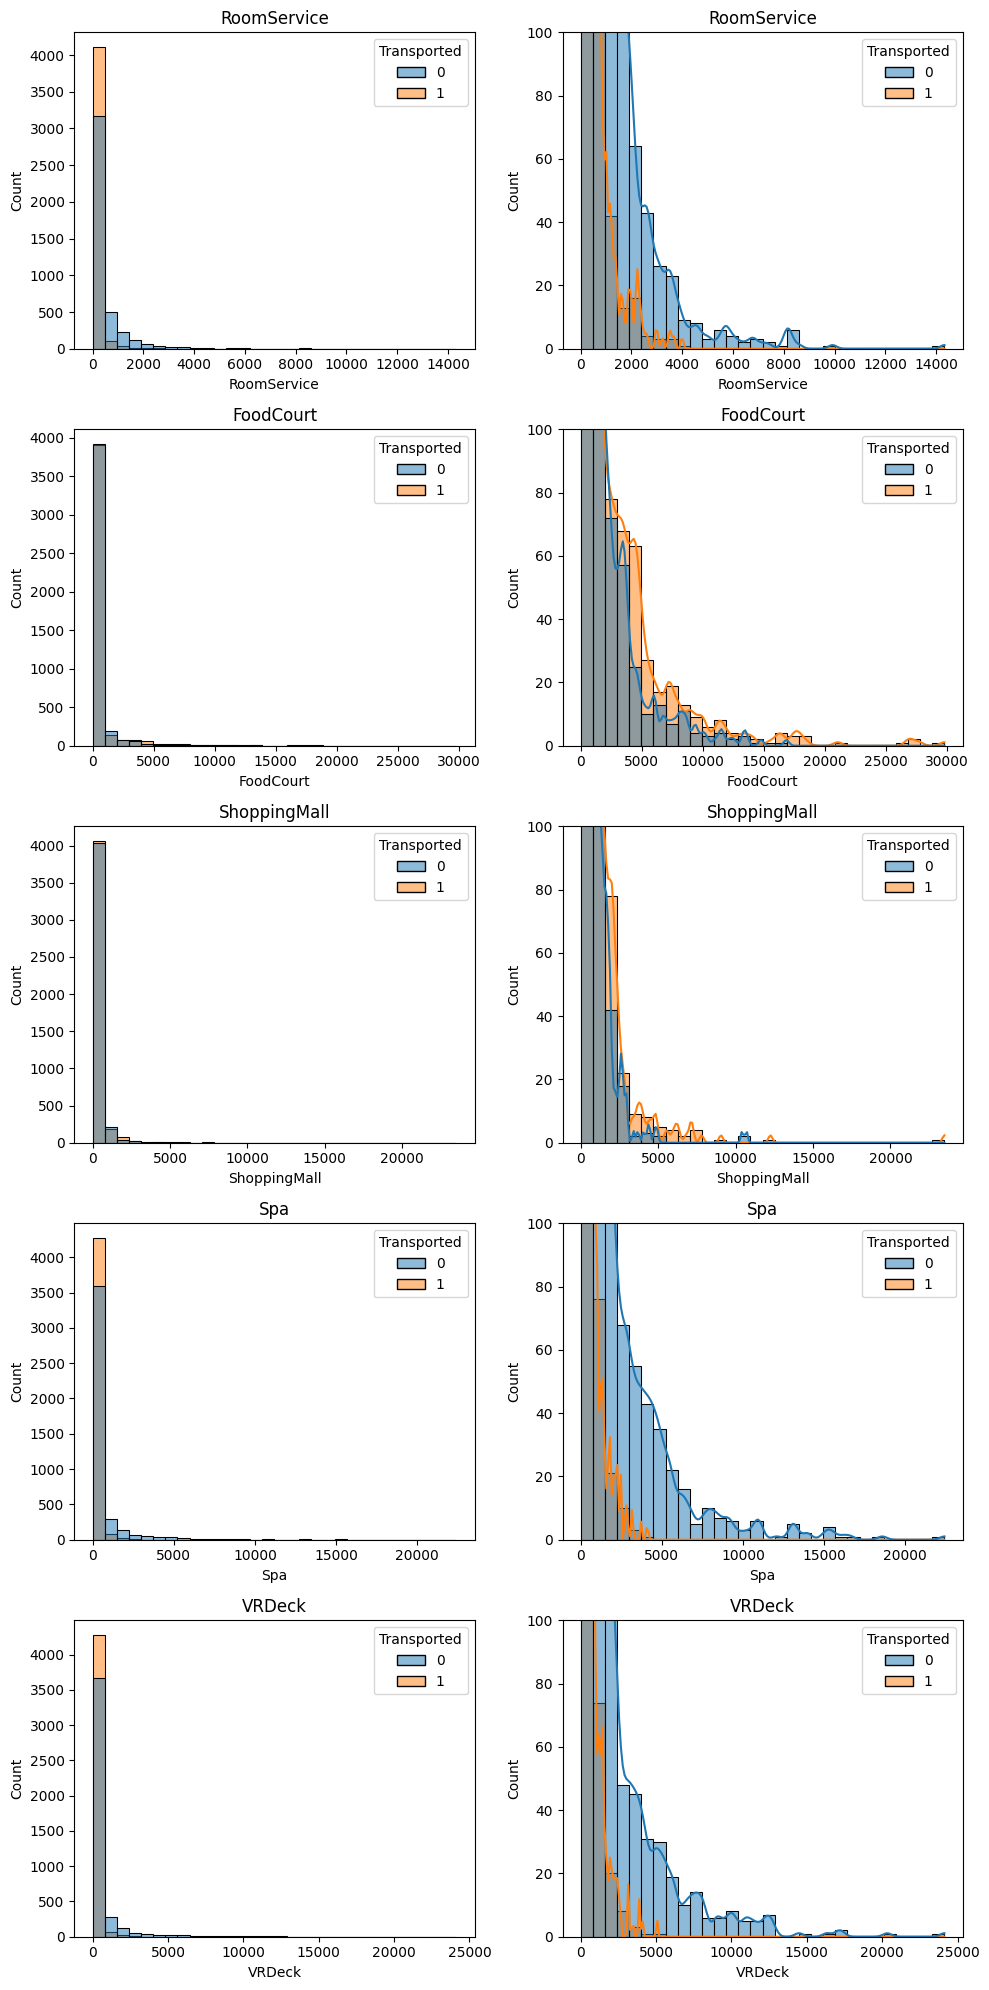

In [18]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- People who were transported tended to spend less.
- Create a new feature that tracks the total expenditure across all 5 amenities.
- Create a binary feature to indicate if the person has not spent anything. (i.e. total expenditure is 0).
- Take the log transform to reduce skew.

In [19]:
# Lets track total amount of expenditure
train_df["TotalExpenditure"] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["ShoppingMall"] + train_df["Spa"] + train_df["VRDeck"]
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,3,0.0
1,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,736.0
2,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,10383.0
3,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,5176.0
4,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1,1091.0


Text(0.5, 0, 'Expenditure ($)')

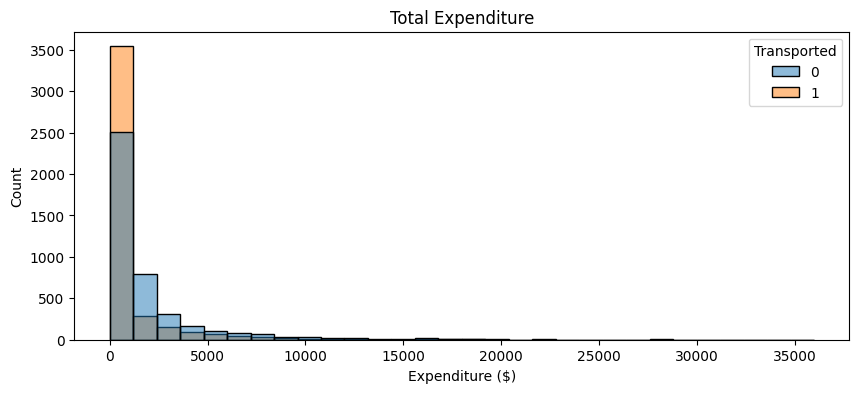

In [20]:
# Lets plot the Transported per Total Expenditure
plt.figure(figsize=(10,4))

# Histogram

sns.histplot(data=train_df, x="TotalExpenditure", bins=30, kde=False, hue='Transported')
# Aesthetics
plt.title('Total Expenditure')
plt.xlabel('Expenditure ($)')

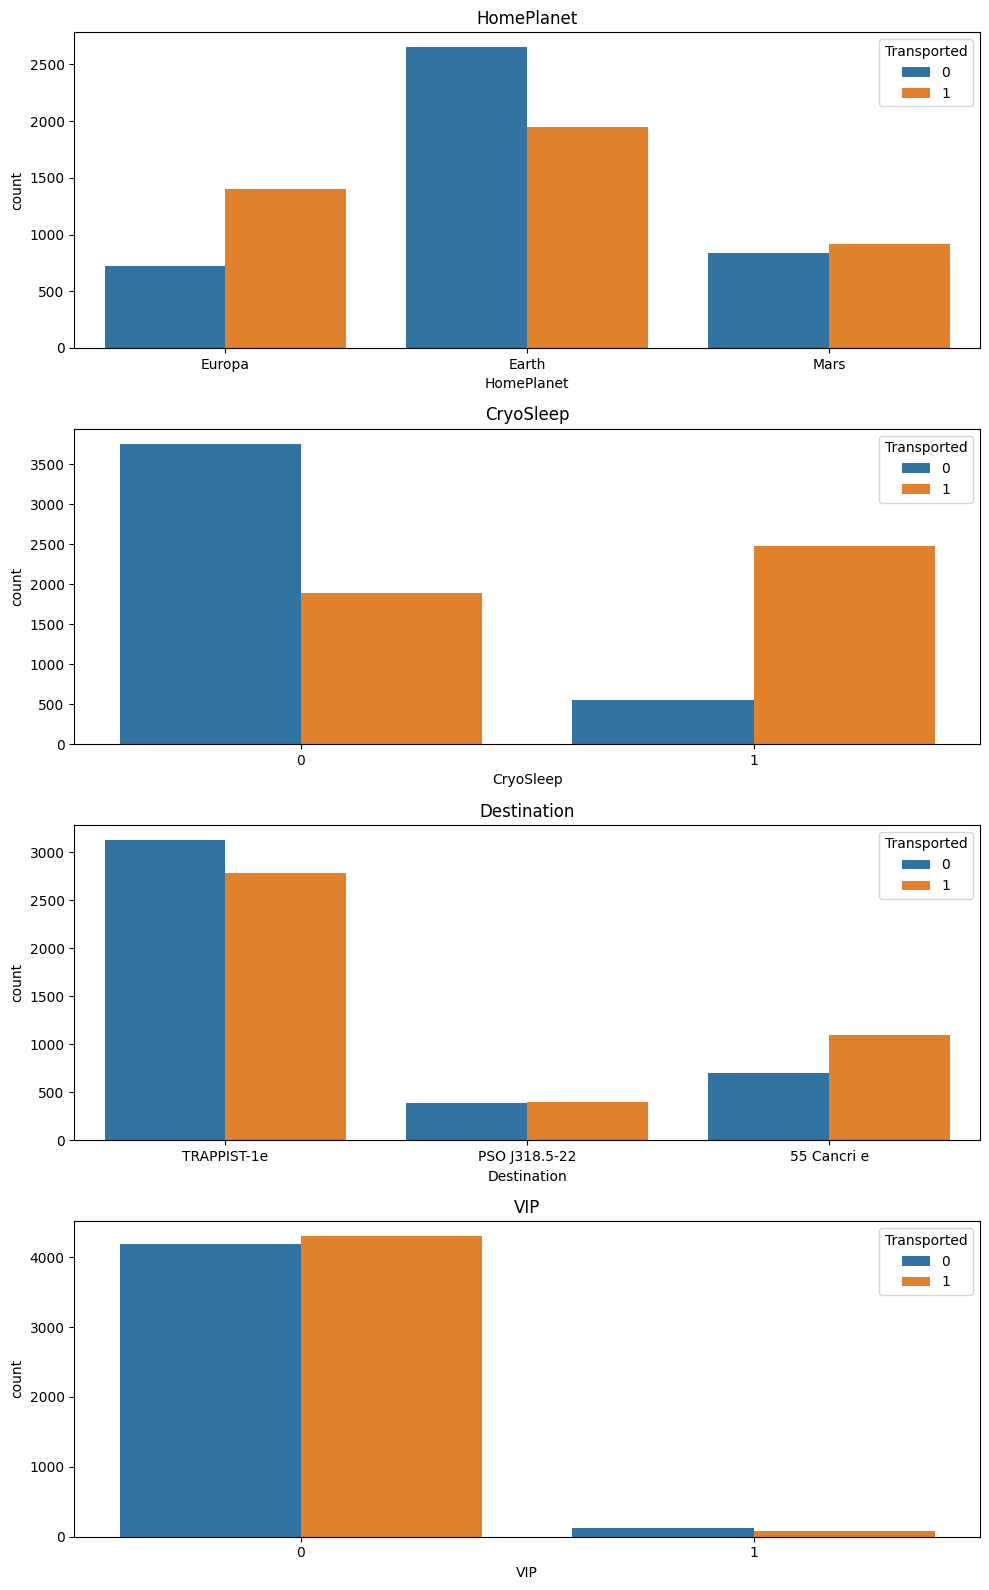

In [21]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

- VIP does not appear to be a useful feature; the target split is more or less equal.
- CryoSleep appears the be a very useful feature in contrast.
- We might consider dropping the VIP column to prevent overfitting.

In [22]:
train_df = train_df.drop("VIP", axis=1)
train_df = train_df.drop("Cabin", axis=1)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,3,0.0
1,Earth,0,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,736.0
2,Europa,0,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,10383.0
3,Europa,0,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,5176.0
4,Earth,0,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1,1091.0


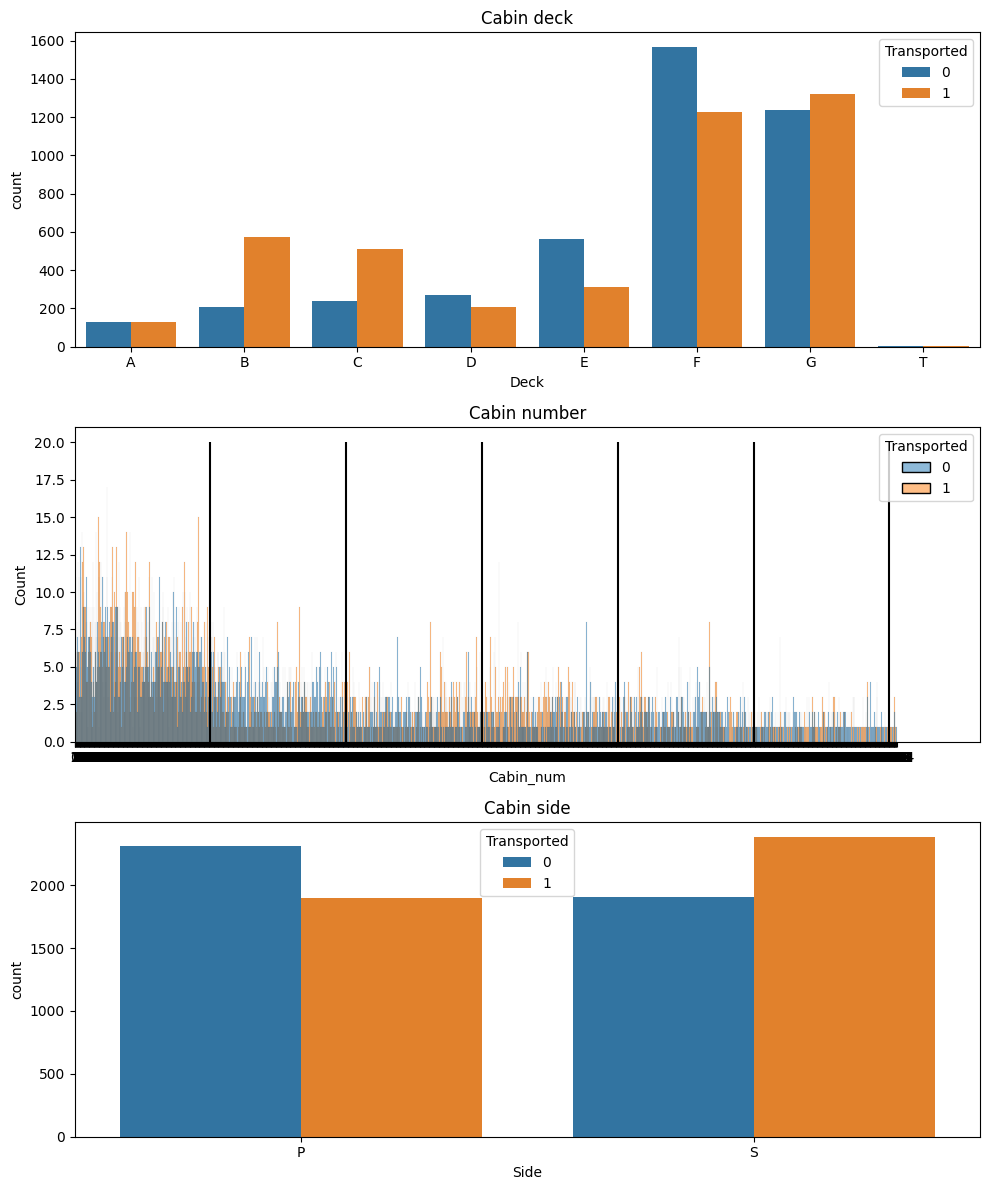

In [26]:
# Lets now work with cabins

# Plot distribution of deck
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

# Plot distribution of Cabin_num
plt.subplot(3,1,2)
sns.histplot(data=train_df, x='Cabin_num', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=20, color='black')
plt.vlines(600, ymin=0, ymax=20, color='black')
plt.vlines(900, ymin=0, ymax=20, color='black')
plt.vlines(1200, ymin=0, ymax=20, color='black')
plt.vlines(1500, ymin=0, ymax=20, color='black')
plt.vlines(1800, ymin=0, ymax=20, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

# Plot distribution of Side
plt.subplot(3,1,3)
sns.countplot(data=train_df, x='Side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

We explore now what to do with missing values

In [28]:
# Columns with missing values
na_cols=train_df.columns[train_df.isna().any()].tolist()

# Missing values summary
mv=pd.DataFrame(train_df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_df),2)
mv

,Number_missing,Percentage_missing
HomePlanet,201,2.31
Destination,182,2.09
Age,179,2.06
RoomService,181,2.08
Deck,199,2.29
Cabin_num,199,2.29
Side,199,2.29
TotalExpenditure,181,2.08


Text(0.5, 1.0, 'Heatmap of missing values')

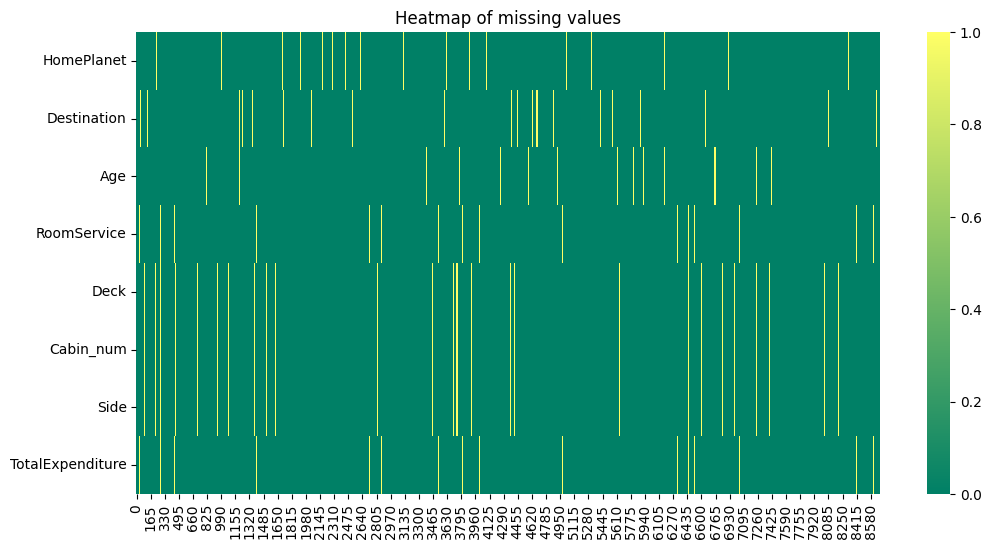

In [29]:
# Heatmap of missing values
plt.figure(figsize=(12,6))
sns.heatmap(train_df[na_cols].isna().T, cmap='summer')
plt.title('Heatmap of missing values')

Missing values make up about 2% of the data, which is a relatively small amount. For the most part, they don't seem to be happening at the same time (except the features made from splitting Cabin and Name), but let's inspect closer.

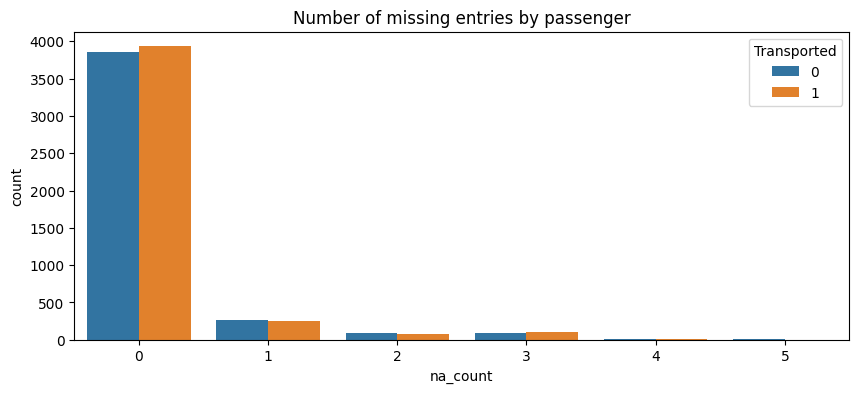

In [30]:
# Countplot of number of missing values by passenger
train_df['na_count']=train_df.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train_df, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train_df.drop('na_count', axis=1, inplace=True)

- Missing values are independent of the target and for the most part are isolated.
- Even though only 2% of the data is missing, about 25% of all passengers have at least 1 missing value.
- PassengerId is the only (original) feature to not have any missing values.

- Since most of the missing values are isolated it makes sense to try to fill these in as opposed to just dropping rows.
- If there is a relationship between PassengerId and other features we can fill missing values according to this column.

The easiest way to deal with missing values is to just use the median for continuous features and the mode for categorical features. 
This will work 'well enough' but if we want to maximise the accuracy of our models then we need to look for patterns within the missing data. The way to do this is by looking at the joint distribution of features.

<Axes: xlabel='Deck', ylabel='HomePlanet'>

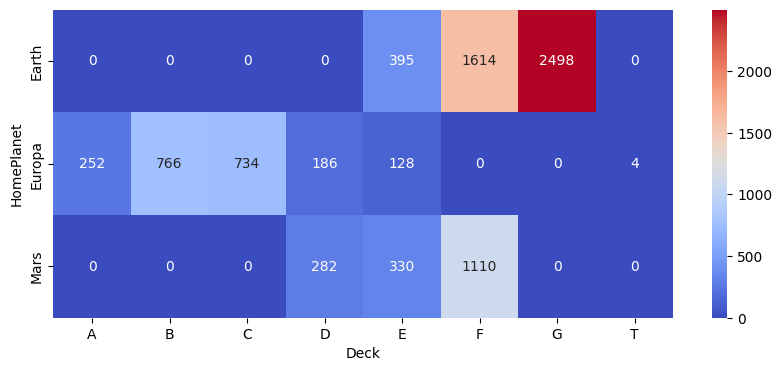

In [35]:
# Joint distribution of CabinDeck and HomePlanet
CDHP_gb=train_df.groupby(['Deck','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(CDHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

- Passengers on decks A, B, C or T came from Europa.
- Passengers on deck G came from Earth.
- Passengers on decks D, E or F came from multiple planets.

In [36]:
# Missing values before
HP_bef=train_df['HomePlanet'].isna().sum()

# Decks A, B, C or T came from Europa
train_df.loc[(train_df['HomePlanet'].isna()) & (train_df['Deck'].isin(['A', 'B', 'C', 'T'])), 'HomePlanet']='Europa'

# Deck G came from Earth
train_df.loc[(train_df['HomePlanet'].isna()) & (train_df['Deck']=='G'), 'HomePlanet']='Earth'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',train_df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 201
#HomePlanet missing values after: 109


<Axes: xlabel='Destination', ylabel='HomePlanet'>

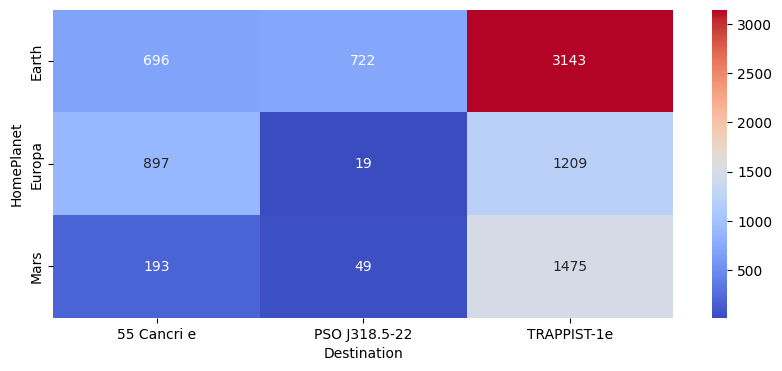

In [37]:
# Joint distribution of CabinDeck and HomePlanet
DHP_gb=train_df.groupby(['Destination','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Heatmap of missing values
plt.figure(figsize=(10,4))
sns.heatmap(DHP_gb.T, annot=True, fmt='g', cmap='coolwarm')

Most people heading towards TRAPPIST-1e came from Earth so it makes sense to guess they came from there. But remember from earlier, no one on deck D came from Earth so we need to filter these out.

In [38]:
# Missing values before
HP_bef=train_df['HomePlanet'].isna().sum()

# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D)
train_df.loc[(train_df['HomePlanet'].isna()) & ~(train_df['Deck']=='D'), 'HomePlanet']='Earth'
train_df.loc[(train_df['HomePlanet'].isna()) & (train_df['Deck']=='D'), 'HomePlanet']='Mars'

# Print number of missing values left
print('#HomePlanet missing values before:',HP_bef)
print('#HomePlanet missing values after:',train_df['HomePlanet'].isna().sum())

#HomePlanet missing values before: 109
#HomePlanet missing values after: 0


Since the majority (68%) of passengers are heading towards TRAPPIST-1e (see EDA section), we'll just impute this value (i.e. the mode). A better rule hasn't been found at this stage.

In [39]:
# Missing values before
D_bef=train_df['Destination'].isna().sum()

# Fill missing Destination values with mode
train_df.loc[(train_df['Destination'].isna()), 'Destination']='TRAPPIST-1e'

# Print number of missing values left
print('#Destination missing values before:',D_bef)
print('#Destination missing values after:',train_df['Destination'].isna().sum())

#Destination missing values before: 182
#Destination missing values after: 0


In [41]:
# Joint distribution of deck, Destination and homeplanet
train_df.groupby(['HomePlanet','Destination','Deck'])['Deck'].size().unstack().fillna(0)

Deck                          A      B      C      D      E       F       G  \
HomePlanet Destination                                                        
Earth      55 Cancri e      0.0    0.0    0.0    0.0   50.0   275.0   365.0   
           PSO J318.5-22    0.0    0.0    0.0    0.0   29.0   221.0   461.0   
           TRAPPIST-1e      0.0    0.0    0.0    0.0  339.0  1188.0  1733.0   
Europa     55 Cancri e    108.0  333.0  317.0   62.0   45.0     0.0     0.0   
           PSO J318.5-22    2.0    3.0   13.0    0.0    0.0     0.0     0.0   
           TRAPPIST-1e    146.0  443.0  417.0  124.0   83.0     0.0     0.0   
Mars       55 Cancri e      0.0    0.0    0.0   51.0   21.0   123.0     0.0   
           PSO J318.5-22    0.0    0.0    0.0   17.0   12.0    20.0     0.0   
           TRAPPIST-1e      0.0    0.0    0.0  224.0  297.0   967.0     0.0   

Deck                        T  
HomePlanet Destination         
Earth      55 Cancri e    0.0  
           PSO J318.5-22  0.0  
           TRAPPIST-1e    0.0  
Europa     55 Cancri e    0.0  
           PSO J318.5-22  0.0  
           TRAPPIST-1e    5.0  
Mars       55 Cancri e    0.0  
           PSO J318.5-22  0.0  
           TRAPPIST-1e    0.0

- Passengers from Mars are most likely in deck F.
- Passengers from Europa are (more or less) most likely in deck C and deck B otherwise.
- Passengers from Earth are (more or less) most likely in deck G.

In [43]:
# Missing values before
CD_bef=train_df['Deck'].isna().sum()

# Fill missing values using the mode
na_rows_CD=train_df.loc[train_df['Deck'].isna(),'Deck'].index
train_df.loc[train_df['Deck'].isna(),'Deck']=train_df.groupby(['HomePlanet','Destination'])['Deck'].transform(lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Print number of missing values left
print('#Cabin_deck missing values before:',CD_bef)
print('#Cabin_deck missing values after:',train_df['Deck'].isna().sum())

#Cabin_deck missing values before: 0
#Cabin_deck missing values after: 0


In [50]:
# Age varies across many features like HomePlanet, group size, expenditure and cabin deck, 
# so we will impute missing values according to the median of these subgroups.

# Joint distribution
train_df.groupby(['HomePlanet','Deck'])['Age'].median().unstack().fillna(0)

Deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0.0,0.0,0.0,0.0,25.0,24.0,22.0,0.0
Europa,34.0,32.0,33.0,33.0,32.0,0.0,0.0,37.0
Mars,0.0,0.0,0.0,31.0,28.0,27.0,0.0,0.0


In [48]:
# Missing values before
A_bef=train_df[exp_feats].isna().sum().sum()

# Fill missing values using the median
na_rows_A=train_df.loc[train_df['Age'].isna(),'Age'].index
train_df.loc[train_df['Age'].isna(),'Age']=train_df.groupby(['HomePlanet', 'Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A]

# Print number of missing values left
print('#Age missing values before:',A_bef)
print('#Age missing values after:',train_df['Age'].isna().sum())

#Age missing values before: 181
#Age missing values after: 0


In [52]:
# Let's update the age_group feature using the new data.
train_df.loc[(train_df['Age']>0) & (train_df['Age']<19),'AgeGroup']=1
train_df.loc[(train_df['Age']>18) & (train_df['Age']<26),'AgeGroup']=2
train_df.loc[train_df['Age']>25,'AgeGroup']=3

In [54]:
# Passengers sleeping should not expend money
print('Maximum expenditure of passengers in CryoSleep:',train_df.loc[train_df['CryoSleep']==True,exp_feats].sum(axis=1).max())

Maximum expenditure of passengers in CryoSleep: 0.0


In [58]:
# Missing values before
E_bef=train_df["TotalExpenditure"].isna().sum()

# CryoSleep has no expenditure

train_df.loc[(train_df["TotalExpenditure"].isna()) & (train_df['CryoSleep']==True)]=0

# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',train_df[exp_feats].isna().sum().sum())

#Expenditure missing values before: 113
#Expenditure missing values after: 113


In [61]:
# Joint distribution
train_df.groupby(['HomePlanet','AgeGroup'])["TotalExpenditure"].mean().unstack().fillna(0)

AgeGroup,0,1,2,3
HomePlanet,,,,
0,0.0,0.000000,0.000000,0.000000
Earth,0.0,412.304310,780.329362,813.538580
Europa,0.0,1223.612903,2544.974729,3834.557169
Mars,0.0,828.500000,1169.877049,1140.575463


In [64]:
# Missing values before
E_bef=train_df[exp_feats].isna().sum().sum()

# Fill remaining missing values using the median
for col in exp_feats:
    na_rows=train_df.loc[train_df[col].isna(),col].index
    train_df.loc[train_df[col].isna(),col]=train_df.groupby(['HomePlanet','AgeGroup'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]
    
# Print number of missing values left
print('#Expenditure missing values before:',E_bef)
print('#Expenditure missing values after:',train_df[exp_feats].isna().sum().sum())

#Expenditure missing values before: 0
#Expenditure missing values after: 0


In [65]:
# Update expenditure and no_spending
train_df["TotalExpenditure"]=train_df[exp_feats].sum(axis=1)

In [67]:
train_df.isna().sum()

HomePlanet            0
CryoSleep             0
Destination           0
Age                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Transported           0
Deck                  0
Cabin_num           197
Side                197
AgeGroup              0
TotalExpenditure      0
dtype: int64

# Preprocessing

In [69]:
X=train_df.copy()

In [70]:
X

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side,AgeGroup,TotalExpenditure
0,Europa,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0,B,0,P,3,0.0
1,Earth,0,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,1,F,0,S,2,736.0
2,Europa,0,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S,3,10383.0
3,Europa,0,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S,3,5176.0
4,Earth,0,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,1,F,1,S,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,0.0,6819.0,0.0,1643.0,74.0,0,A,98,P,3,8536.0
8689,Earth,1,PSO J318.5-22,18.0,0.0,0.0,0.0,0.0,0.0,0,G,1499,S,1,0.0
8690,Earth,0,TRAPPIST-1e,26.0,0.0,0.0,1872.0,1.0,0.0,1,G,1500,S,3,1873.0
8691,Europa,0,55 Cancri e,32.0,0.0,1049.0,0.0,353.0,3235.0,0,E,608,S,3,4637.0


In [ ]:
# Drop qualitative/redundant/collinear/high cardinality features
X.drop(['AgeGroup', 'Cabin_num'], axis=1, inplace=True)

In [89]:
X_test = pd.read_csv("data/test.csv")
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [90]:
# We need to apply the same transformations to the test set
X_test[['CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = X_test[[ 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
X_test["CryoSleep"] = X_test["CryoSleep"].astype(int)
X_test[["Deck", "Cabin_num", "Side"]] = X_test["Cabin"].str.split("/", expand=True)
X_test["TotalExpenditure"] = X_test["RoomService"] + X_test["FoodCourt"] + X_test["ShoppingMall"] + X_test["Spa"] + X_test["VRDeck"]

# Drop qualitative/redundant/collinear/high cardinality features
X_test.drop(['PassengerId', 'Cabin', 'VIP', 'Cabin_num', 'Name'], axis=1, inplace=True)

The logarithm transform is used to decrease skew in distributions, especially with large outliers. It can make it easier for algorithms to 'learn' the correct relationships. We will apply it to the expenditure features as these are heavily skewed by outliers.

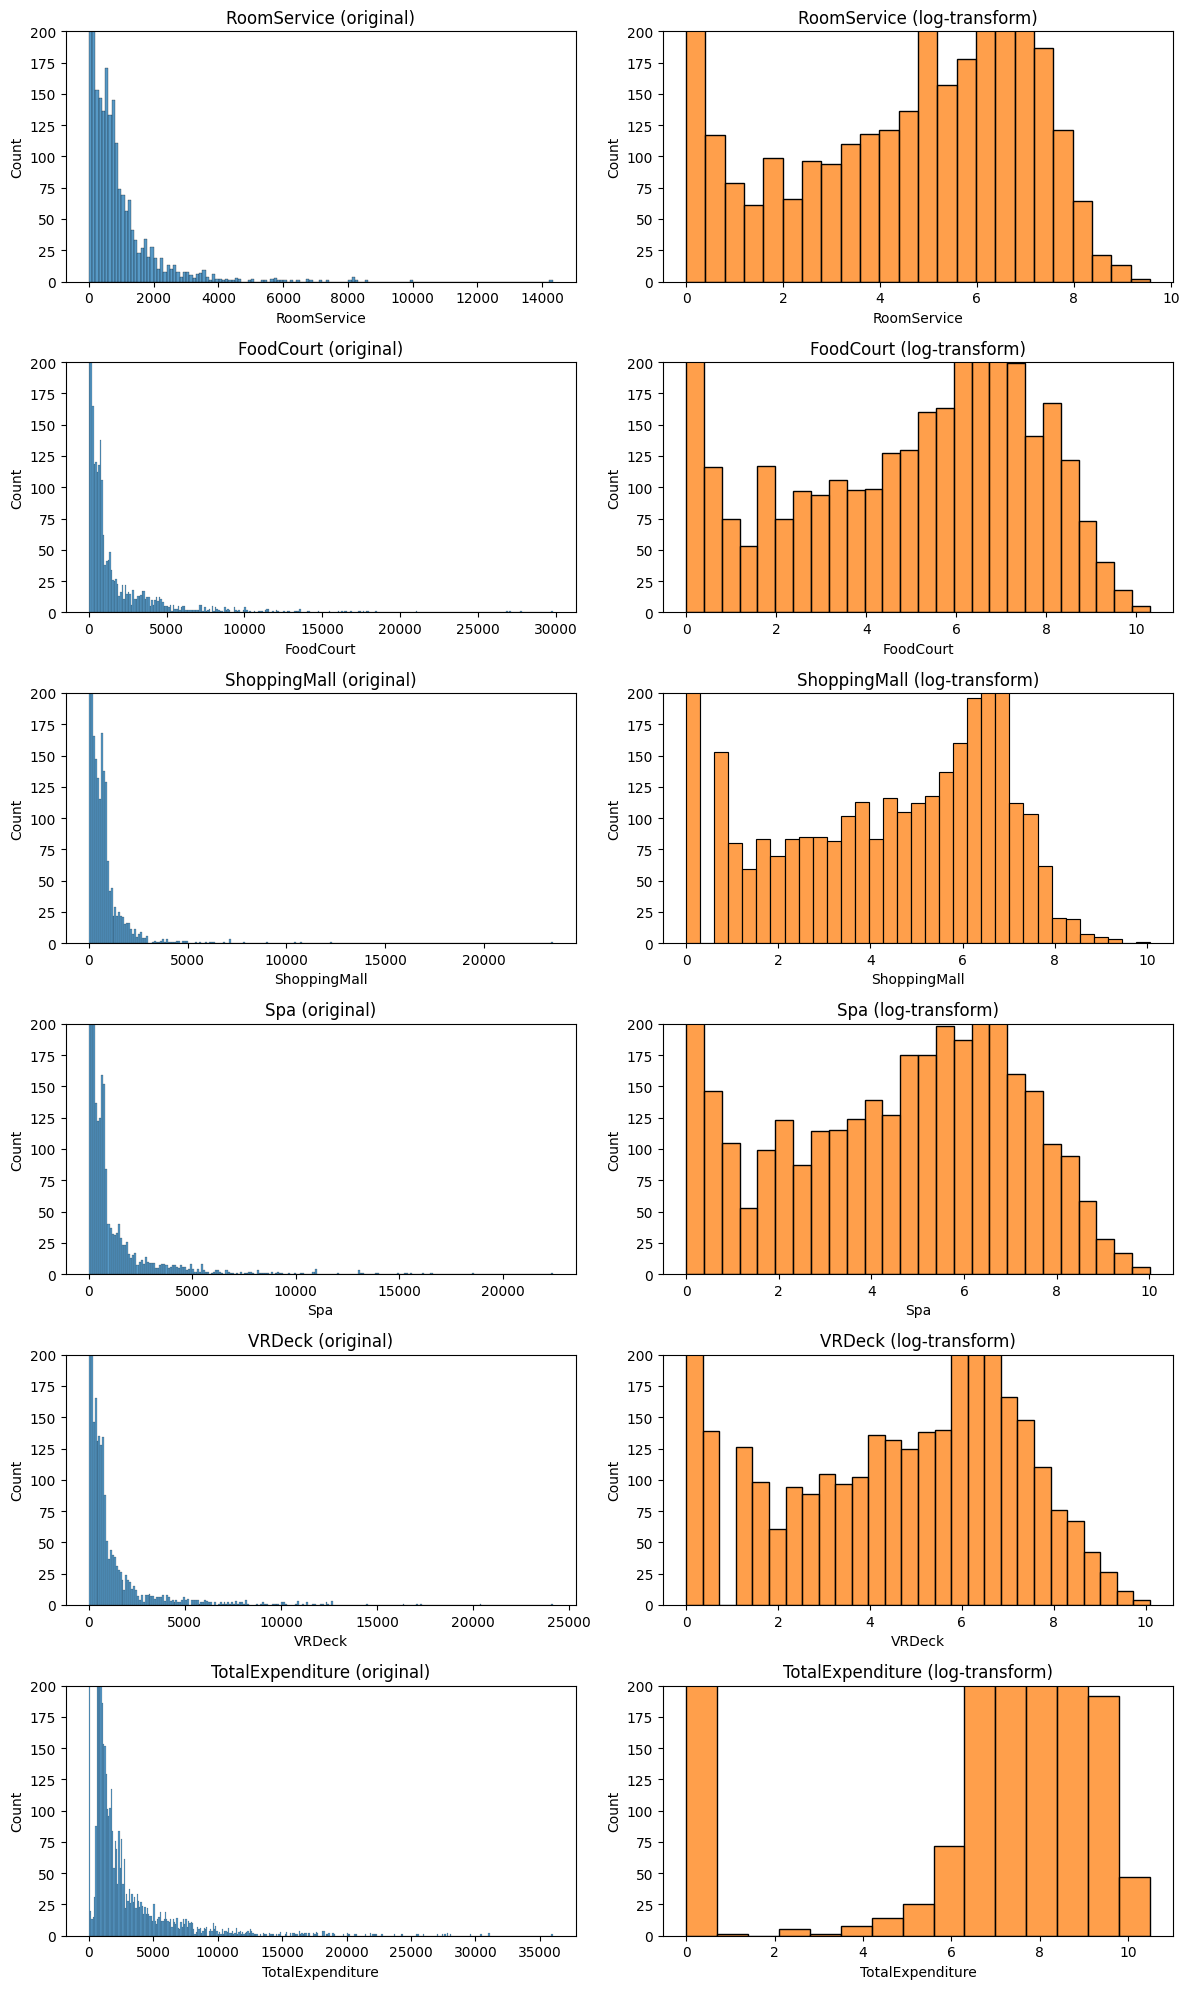

In [73]:
# Plot log transform results
fig=plt.figure(figsize=(12,20))
for i, col in enumerate(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExpenditure']):
    plt.subplot(6,2,2*i+1)
    sns.histplot(X[col], binwidth=100)
    plt.ylim([0,200])
    plt.title(f'{col} (original)')
    
    plt.subplot(6,2,2*i+2)
    sns.histplot(np.log(1+X[col]), color='C1')
    plt.ylim([0,200])
    plt.title(f'{col} (log-transform)')
    
fig.tight_layout()
plt.show()

In [74]:
# Apply log transform
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExpenditure']:
    X[col]=np.log(1+X[col])

In [91]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalExpenditure']:
    X_test[col]=np.log(1+X_test[col])

In [94]:
[cname for cname in X.columns if X[cname].dtype == "object"]

['HomePlanet', 'Destination', 'Deck', 'Side']

In [105]:
# Encoding and scaling
# We will use column transformers to be more professional. It's also good practice

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Indentify numerical and categorical columns
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

# Scale numerical data to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))])

# Combine preprocessing
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)],
        remainder='passthrough')

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

# Print new shape
print('Training set shape:', X.shape)

ValueError: columns are missing: {'Transported'}